Problem Statement: Abalone Age Prediction

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Import necessary dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Reading dataset

In [2]:
data=pd.read_csv(r"/Users/akil/Downloads/IBM Assignments/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

When "Rings" data is added with 1.5, we get "Age" column values

In [5]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


(i) Univariate Analysis

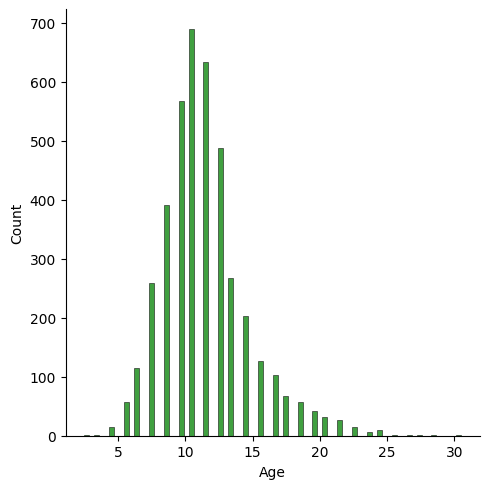

In [7]:
sns.displot(data["Age"], color='green')

<AxesSubplot: xlabel='Count', ylabel='Age'>

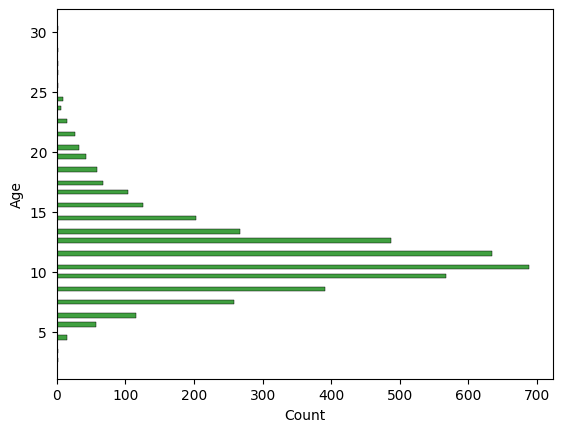

In [10]:
sns.histplot(y=data.Age,color='green') 

<AxesSubplot: xlabel='Age', ylabel='Count'>

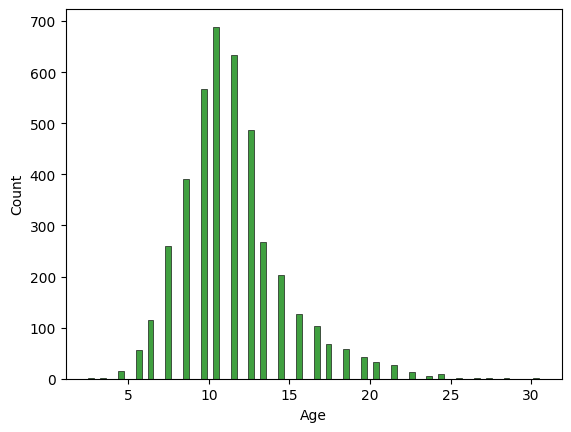

In [11]:
sns.histplot(x=data.Age,color='green') 

<AxesSubplot: xlabel='Age'>

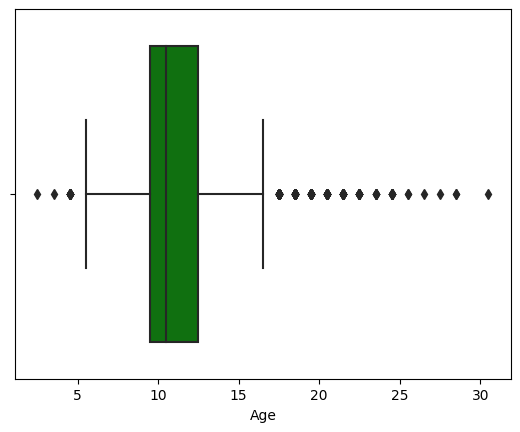

In [16]:
sns.boxplot(x=data.Age,color='green') 

<AxesSubplot: xlabel='Age', ylabel='count'>

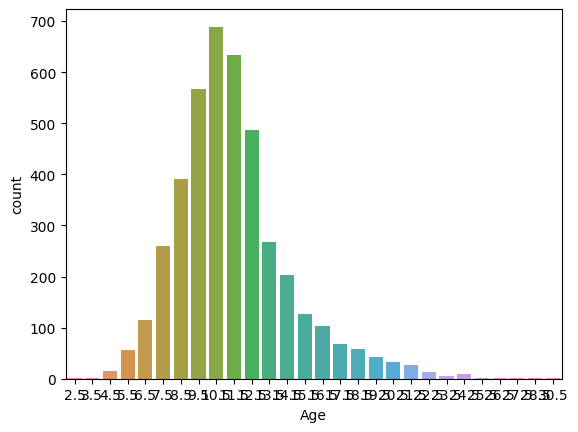

In [14]:
sns.countplot(x=data.Age) 

(ii) Bi-Variate Analysis

<AxesSubplot: xlabel='Height', ylabel='Age'>

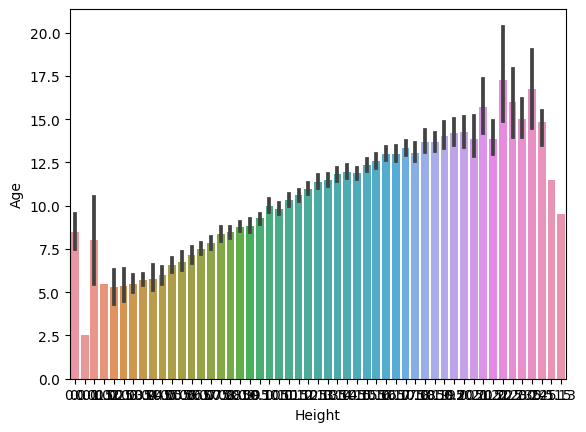

In [15]:
sns.barplot(x=data.Height,y=data.Age)

<AxesSubplot: xlabel='Age', ylabel='Height'>

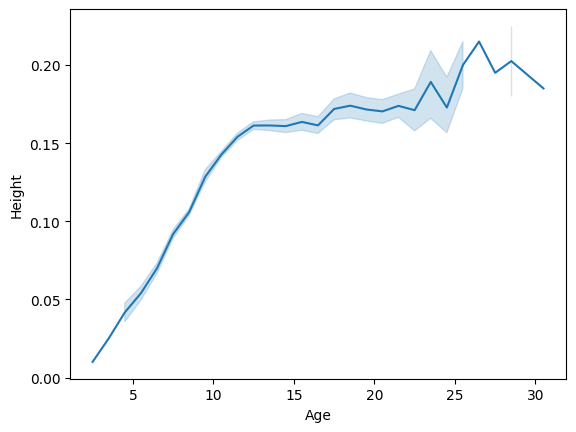

In [17]:
sns.lineplot(x=data.Age,y=data.Height)

<AxesSubplot: xlabel='Age', ylabel='Height'>

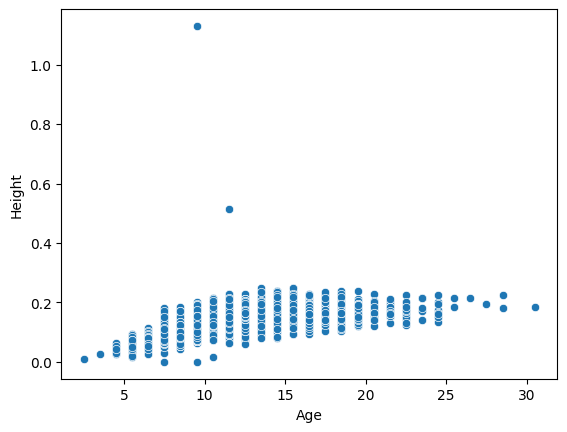

In [18]:
sns.scatterplot(x=data.Age,y=data.Height)

<AxesSubplot: xlabel='Age', ylabel='Height'>

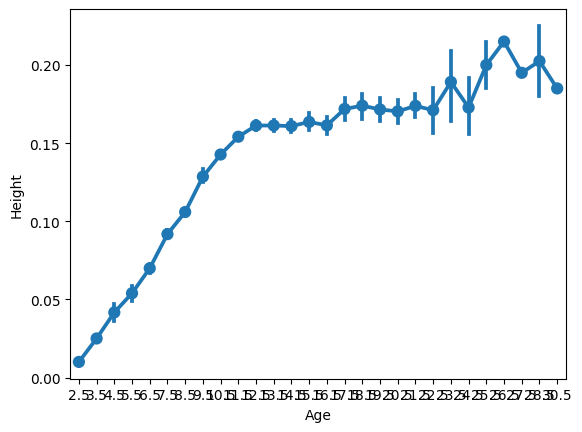

In [19]:
sns.pointplot(x=data.Age, y=data.Height) 

<AxesSubplot: xlabel='Age', ylabel='Height'>

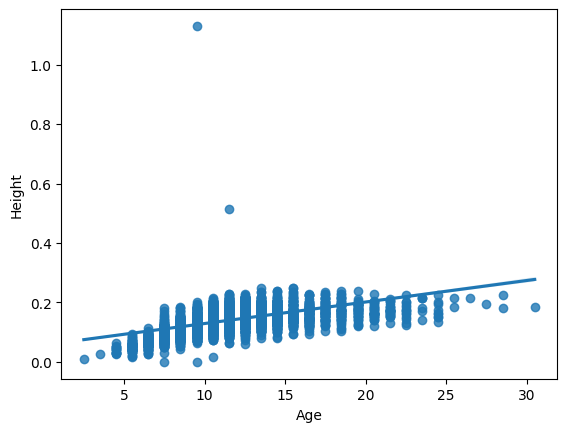

In [20]:
sns.regplot(x=data.Age,y=data.Height) 

(iii) Multi-Variate Analysis

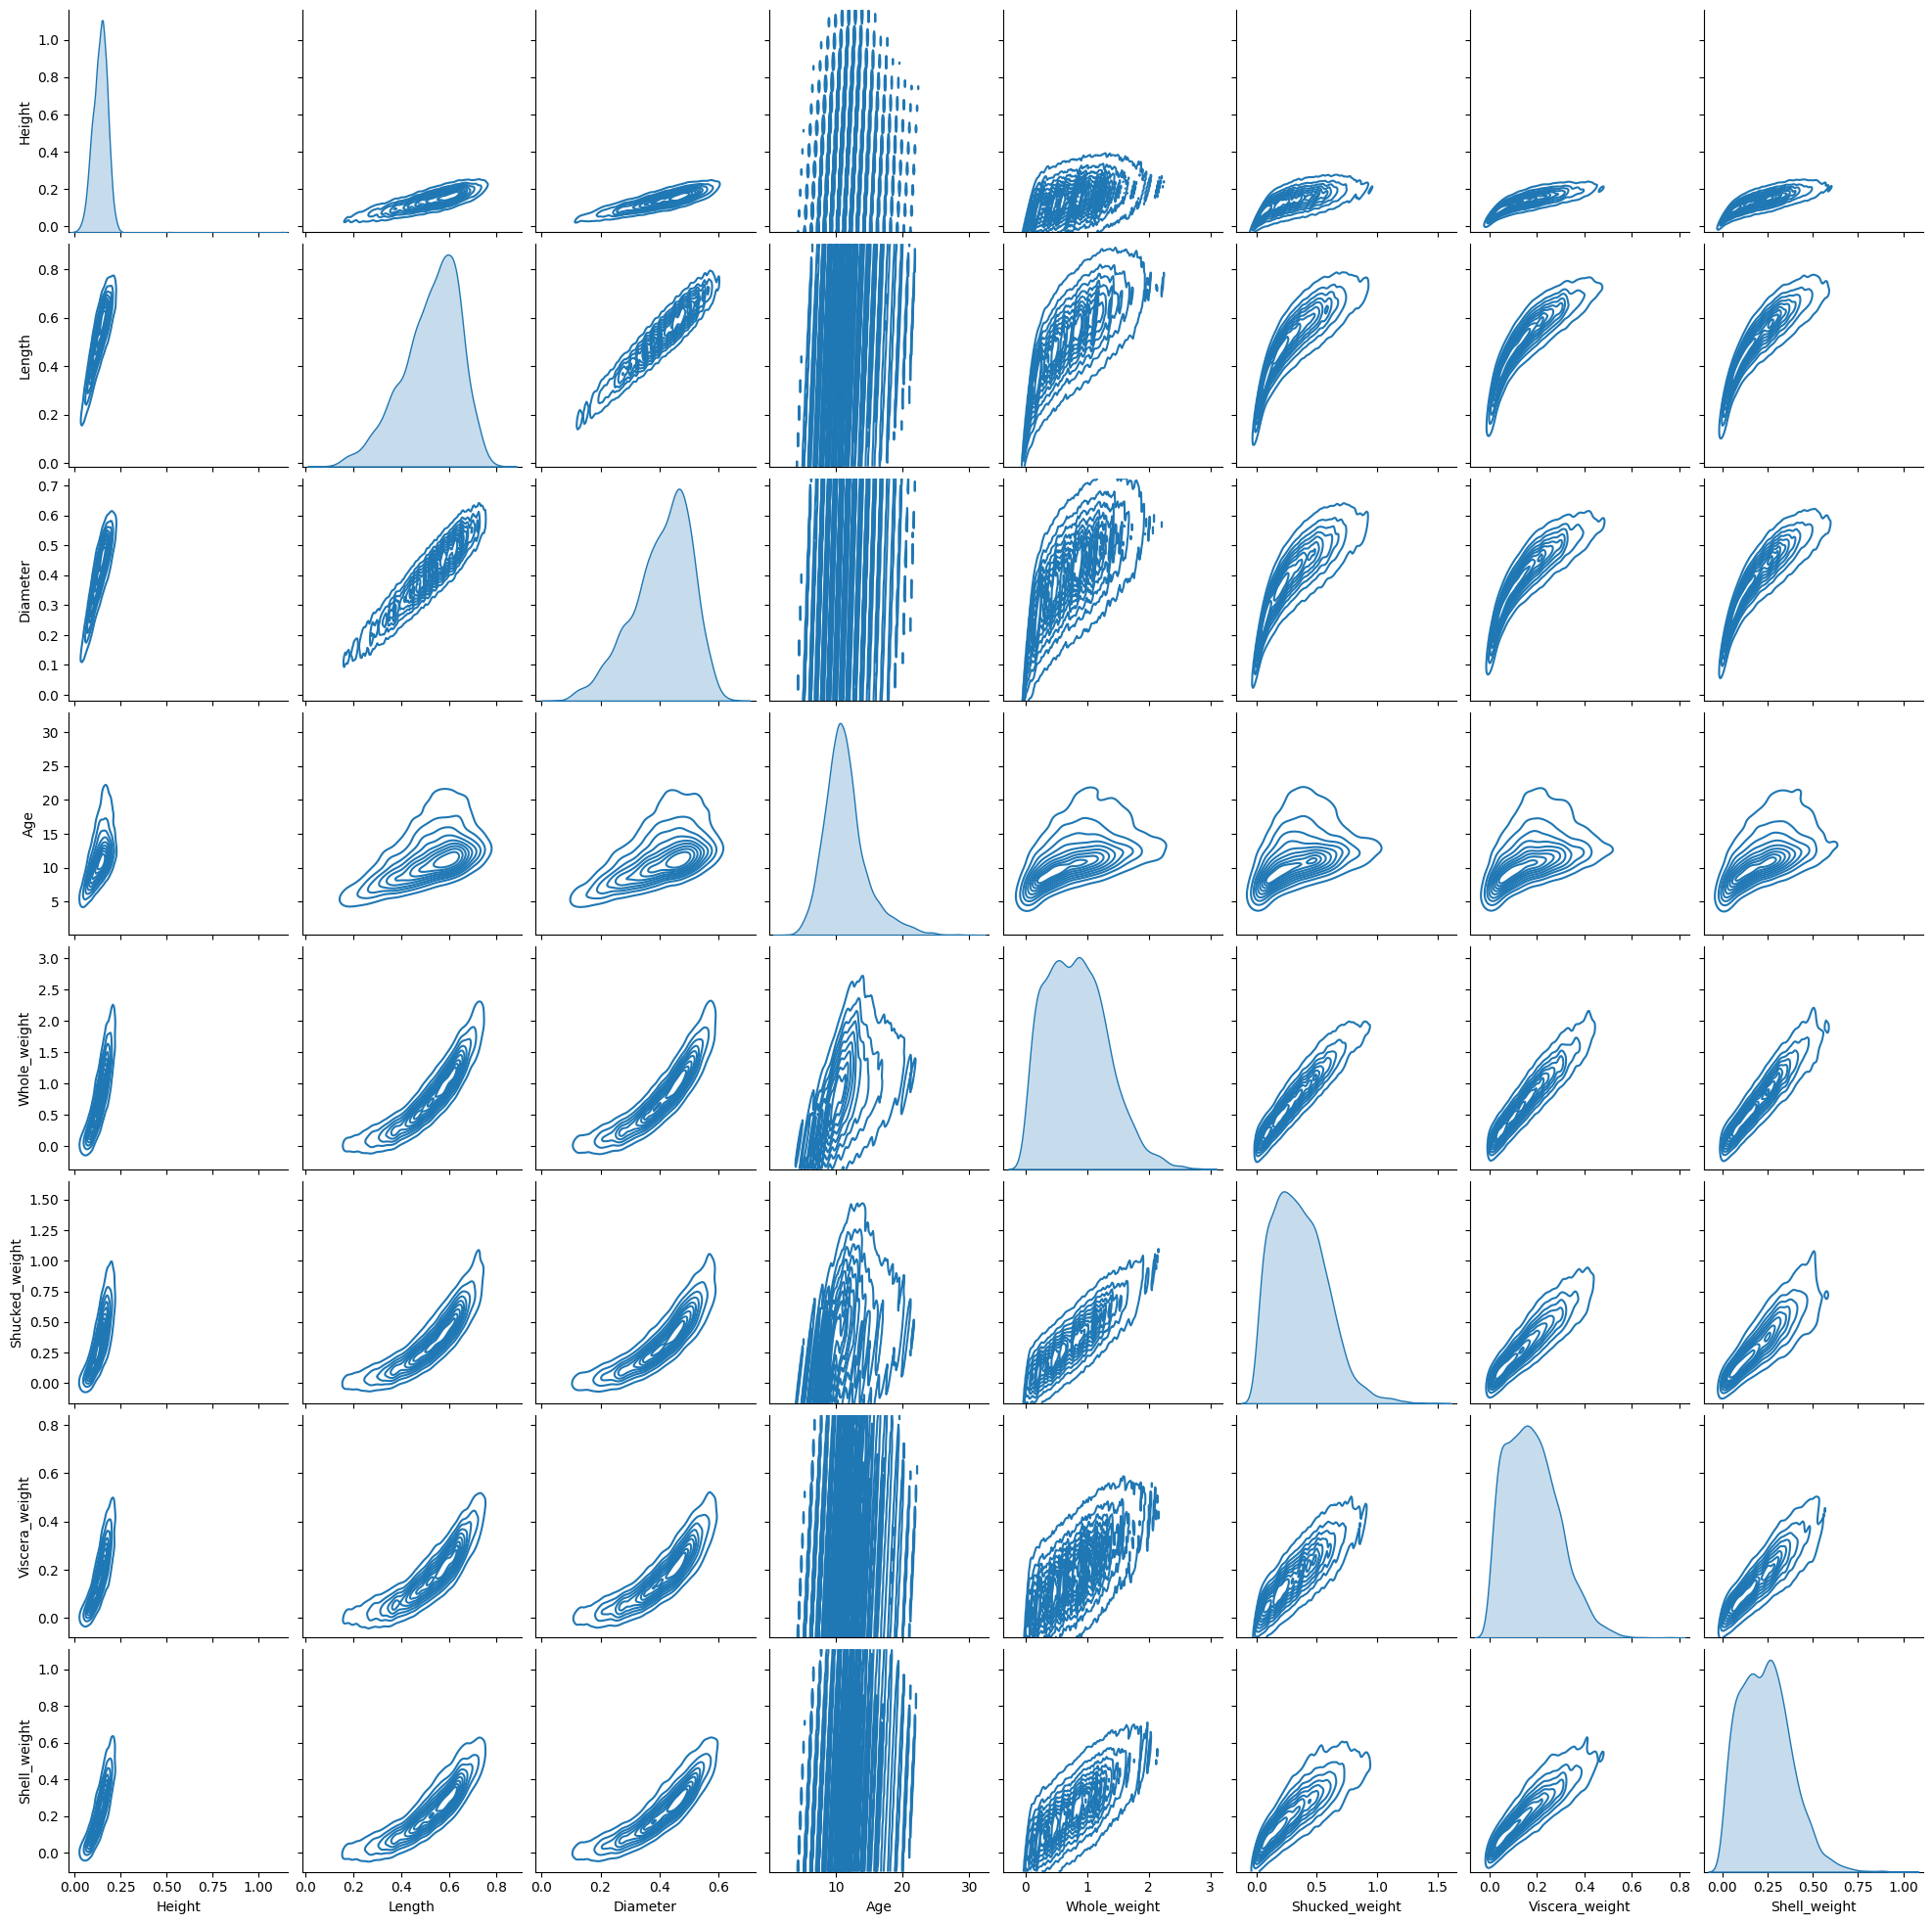

In [25]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight"]],kind="kde")

Descriptive Statistics

In [26]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


Handling missing values

In [27]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

In [29]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

Handle outliers

In [31]:
import warnings
warnings.filterwarnings('ignore')
outliers=data.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [32]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot: xlabel='Age'>

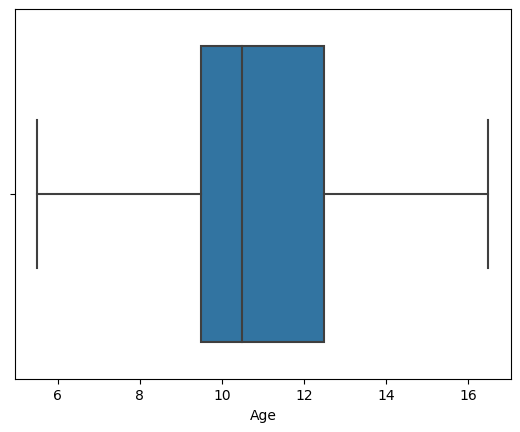

In [33]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

Categorical columns and Label encoding

In [34]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [35]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Split the data into dependent and independent variables.

In [36]:
y = data["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

In [37]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Scale the independent variables

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_Scaled = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.44
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.12
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.20
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.24
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.12


Split the data into training and testing

In [40]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2)

In [41]:
print(X_Train.shape,X_Test.shape)
print(Y_Train.shape,Y_Test.shape)

(3341, 8) (836, 8)
(3341,) (836,)


In [42]:
X_Train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
3572,0.689189,0.680672,0.146018,0.374004,0.326160,0.328506,0.291480,0.20
124,0.385135,0.378151,0.070796,0.061449,0.053800,0.065833,0.068261,0.08
3620,0.763514,0.747899,0.150442,0.447140,0.379287,0.443713,0.312407,0.20
3024,0.540541,0.537815,0.097345,0.160793,0.121722,0.129691,0.157947,0.20
1852,0.567568,0.546218,0.119469,0.179741,0.138198,0.152732,0.162930,0.16


In [43]:
X_Test.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
2035,0.790541,0.773109,0.172566,0.553745,0.493275,0.464121,0.383159,0.20
317,0.506757,0.495798,0.088496,0.129449,0.097848,0.132982,0.118087,0.24
3228,0.466216,0.453782,0.110619,0.137949,0.105245,0.134299,0.113104,0.20
386,0.628378,0.613445,0.137168,0.260846,0.235709,0.199473,0.212755,0.32
2263,0.736486,0.764706,0.132743,0.514964,0.390047,0.377880,0.317389,0.36


In [44]:
Y_Train.head()

3572    0
124     1
3620    0
3024    1
1852    1
Name: Sex, dtype: int64

In [45]:
Y_Test.head()

2035    2
317     2
3228    1
386     2
2263    0
Name: Sex, dtype: int64

Build the Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40,criterion='entropy')

In [53]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [54]:
y_predict = model.predict(X_Test)

Train the Model

In [55]:
y_predict_train = model.predict(X_Train)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training Accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training Accuracy:  0.9994013768332835


Test the Model

In [57]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5514354066985646


Evaluation Metrics

In [58]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,98,36,128
1,19,208,41
2,87,64,155


In [59]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.48      0.37      0.42       262
           1       0.68      0.78      0.72       268
           2       0.48      0.51      0.49       306

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.55      0.54       836



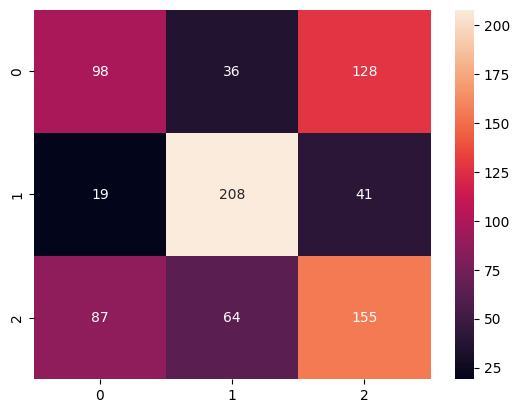

In [63]:
cm = confusion_matrix(Y_Test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()